step: 1000 , loss: 0.0007872993592172861
step: 2000 , loss: 0.0004629645263776183
step: 3000 , loss: 0.0006148064858280122
step: 4000 , loss: 0.00028731298516504467
step: 5000 , loss: 0.0010392330586910248
step: 6000 , loss: 0.00026030497974716127
step: 7000 , loss: 0.0001425920781912282
step: 8000 , loss: 0.00014972736244089901
step: 9000 , loss: 0.022246597334742546
step: 10000 , loss: 0.0014082291163504124


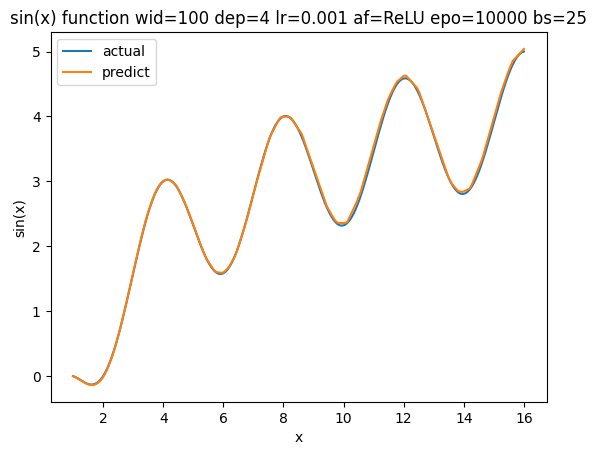

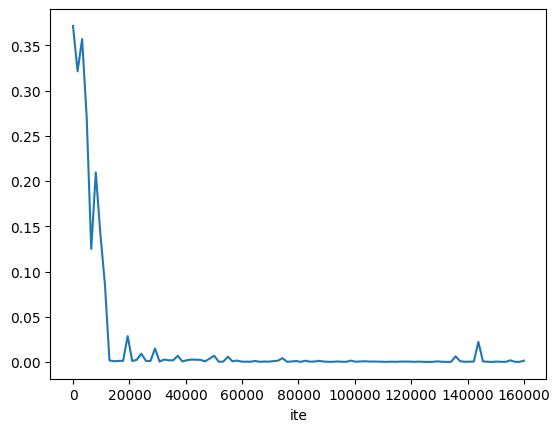

In [5]:
from numpy.core.defchararray import array
from numpy.core.numeric import outer
from torch import nn
from torch.nn.modules import linear
from torch.utils.data import DataLoader, TensorDataset, dataloader
import matplotlib.pyplot as plt
import numpy as np
import torch

# parsms
batch_size = 25
lr = 0.001
epoches = 10000
wid = 100
dep = 4
af = "ReLU"
points = 200

# prepare datasets
x = np.linspace(start = 1, stop= 16, num= points, endpoint=True)
# do not contain 4*pi
# y = np.sin(x)
y = np.log2(x) + np.cos(0.5 * np.pi * x )

# X = np.expand_dims(x,axis=1)
X = x.reshape(-1,1)
Y = y.reshape(points,-1)

# batch them with tensordataset
tX = torch.tensor(X,dtype=torch.float)
tY = torch.tensor(Y,dtype=torch.float)
datasets = TensorDataset(tX,tY)
dataloader = DataLoader(datasets,batch_size,shuffle=True)

# define the net
class cp_Net(torch.nn.Module):
    def __init__(self):
        super(cp_Net, self).__init__()
        self.net=torch.nn.Sequential(
            torch.nn.Linear(1,100),
            #torch.nn.Sigmoid(),
            torch.nn.ReLU(),
            #torch.nn.Tanh(),
            #torch.nn.LeakyReLU(1),
            #torch.nn.Softplus(),
            #torch.nn.ELU(0.1),
            torch.nn.Linear(100,100),
            torch.nn.ReLU(),
            torch.nn.Linear(100,100),
            torch.nn.ReLU(),
            torch.nn.Linear(100,100),
            torch.nn.ReLU(),
            torch.nn.Linear(100,1)
        )

    def forward(self, input:torch.FloatTensor):
        return self.net(input)
        
net=cp_Net()

# define optimizer and loss func
optim = torch.optim.Adam(cp_Net.parameters(net),lr)
Loss  = torch.nn.MSELoss()

# start training
lossres = []
for epoch in range(epoches):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net(batch_x)
        loss=Loss(y_predict,batch_y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    # print loss every epoches/10 epochs
    if (epoch+1)%(epoches/10)==0:
        print("step: {0} , loss: {1}".format(epoch+1,loss.item()))
    if (epoch+1)%(epoches/100)==0:
        lossres += [loss.item()]

# plot the trained results and the real values.
def cp_plot(dep,wid,lr,af,epo,bs):
    plt.plot(x,y,label="actual")
    plt.plot(x,net(tX).detach().numpy(),label="predict")
    sf = "wid=" + str(wid) + " dep=" + str(dep) + " lr=" + str(lr) + " af=" + str(af) + " epo=" + str(epoches) + " bs=" + str(batch_size) 
    plt.title(sf)
    plt.xlabel("x")
    plt.ylabel("sin(x)")
    plt.legend()
    # plt.savefig(fname=sf + ".png")
    plt.show()
   

cp_plot(dep,wid,lr,af,epoches,batch_size)
plt.plot(np.linspace(1, int(epoches*400/batch_size), 100),np.array(lossres))
plt.xlabel("ite")
#plt.savefig(fname= str(int(epoches*400/batch_size))+ ".png")
#plt.savefig(fname= "lr="+ str(lr)+ ".png")
# plt.savefig(fname = "wid=" + str(wid) + " dep=" + str(dep) + " epo=" + str(epoches)+ ".png")
plt.show()

In [14]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class CPNetTrainer:
    def __init__(self, batch_size, lr, epochs, width, depth, activation_fn, points):
        self.batch_size = batch_size
        self.lr = lr
        self.epochs = epochs
        self.width = width
        self.depth = depth
        self.activation_fn = activation_fn
        self.points = points
        self.net = None
        self.optim = None
        self.loss = None
        self.dataloader = None
        self.lossres = []

    def prepare_data(self):
        x = np.linspace(start=1, stop=16, num=self.points, endpoint=True)
        y = np.log2(x) + np.cos(0.5 * np.pi * x)
        X = x.reshape(-1, 1)
        Y = y.reshape(self.points, -1)
        tX = torch.tensor(X, dtype=torch.float)
        tY = torch.tensor(Y, dtype=torch.float)
        datasets = TensorDataset(tX, tY)
        self.dataloader = DataLoader(datasets, self.batch_size, shuffle=True)

    def build_model(self):
        # self.net = nn.Sequential(
        #     nn.Linear(1, self.width),
        #     getattr(nn, self.activation_fn)()
        # )
        # for _ in range(self.depth):
        #     self.net.add_module('linear', nn.Linear(self.width, self.width))
        #     self.net.add_module('activation', getattr(nn, self.activation_fn)())
        # self.net.add_module('output', nn.Linear(self.width, 1))
        self.net=torch.nn.Sequential(
            torch.nn.Linear(1,self.width),
            #torch.nn.Sigmoid(),
            torch.nn.ReLU(),
            #torch.nn.Tanh(),
            #torch.nn.LeakyReLU(1),
            #torch.nn.Softplus(),
            #torch.nn.ELU(0.1),
            torch.nn.Linear(self.width,self.width),
            torch.nn.ReLU(),
            torch.nn.Linear(self.width,self.width),
            torch.nn.ReLU(),
            torch.nn.Linear(self.width,self.width),
            torch.nn.ReLU(),
            torch.nn.Linear(self.width,1)
        )

    def train(self):
        self.optim = torch.optim.Adam(self.net.parameters(), self.lr)
        self.loss = nn.MSELoss()

        for epoch in range(self.epochs):
            running_loss = None
            for batch_x, batch_y in self.dataloader:
                y_predict = self.net(batch_x)
                running_loss = self.loss(y_predict, batch_y)
                self.optim.zero_grad()
                running_loss.backward()
                self.optim.step()

            if (epoch + 1) % (self.epochs / 10) == 0:
                print("step: {0}, loss: {1}".format(epoch + 1, running_loss.item()))
            if (epoch + 1) % (self.epochs / 100) == 0:
                self.lossres.append(running_loss.item())

    def plot_results(self):
        x = np.linspace(start=1, stop=16, num=self.points, endpoint=True)
        y_actual = np.log2(x) + np.cos(0.5 * np.pi * x)
        y_predict = self.net(torch.tensor(x.reshape(-1, 1), dtype=torch.float)).detach().numpy()

        plt.plot(x, y_actual, label="actual")
        plt.plot(x, y_predict, label="predict")
        plt.xlabel("x")
        plt.title("Trained Results vs Actual Values")
        plt.legend()
        plt.show()

    def plot_loss(self):
        iterations = np.linspace(1, self.epochs, len(self.lossres))
        plt.plot(iterations, np.array(self.lossres))
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training Loss")
        plt.show()


step: 1000, loss: 0.16402961313724518
step: 2000, loss: 0.0004273534577805549
step: 3000, loss: 0.0014166301116347313
step: 4000, loss: 0.0003680679656099528
step: 5000, loss: 0.0003431576187722385
step: 6000, loss: 0.0142583092674613
step: 7000, loss: 0.00022495391021948308
step: 8000, loss: 0.0008799664210528135
step: 9000, loss: 0.00011148470366606489
step: 10000, loss: 9.39187957555987e-05


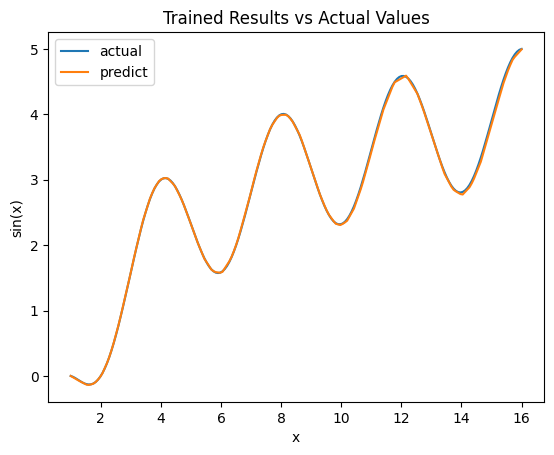

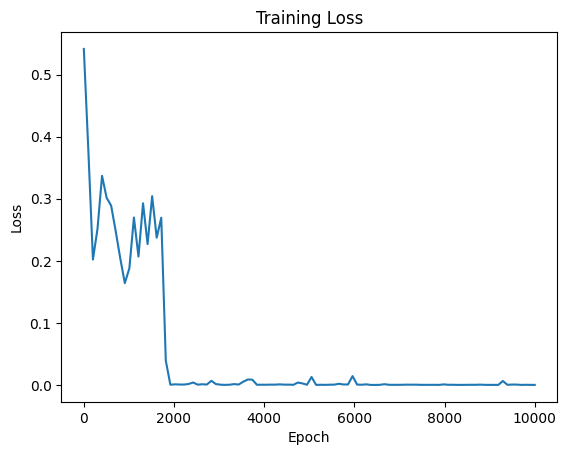

In [16]:
# Usage
trainer = CPNetTrainer(batch_size=25, lr=0.001, epochs=10000, width=100, depth=4, activation_fn="ReLU", points=200)
trainer.prepare_data()
trainer.build_model()
trainer.train()
trainer.plot_results()
trainer.plot_loss()